<a href="https://colab.research.google.com/github/kvishnu78/ML-Algorithms/blob/main/Naive_Bayes_Classifier_Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

upoading dataset

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving winequalityN.csv to winequalityN.csv


Import Section

In [ ]:
import pandas as pd #to read from excel
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns

# train test split
from sklearn.model_selection import train_test_split

# Evaluation metrics
from sklearn import metrics

# Cross Validation
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import GaussianNB#for naive bayes using gaussian Naive bayes
from sklearn.naive_bayes import BernoulliNB#for naive bayes using bernoulli Naive bayes


Loading the dataset

In [ ]:
dataset=pd.read_csv("winequalityN.csv")
dataset.isnull().sum()


type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
dataset.update(dataset.fillna(dataset.mean()))
dataset.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
features = ['fixed acidity','volatile acidity','citric acid','chlorides','alcohol','residual sugar','pH','density','sulphates','free sulfur dioxide','total sulfur dioxide']#input values to the model-not all the attributes are chosen
x = dataset[features]
y = dataset['quality'] 

# x1=dataset.iloc[:,:-1]
# y1=dataset.iloc[:,12]


In [ ]:
train_x1,test_x1,train_y1,test_y1=train_test_split(x,y,test_size=0.30,random_state=3,shuffle=True)
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.10,random_state=3,shuffle=True)

In [ ]:
#Normalisation
#using normalised data as dataset is made of numerical values and is in diff ranges
from sklearn.preprocessing import Normalizer
N=Normalizer()
train_x=N.fit_transform(train_x)
test_x=N.transform(test_x)

train_x1=N.fit_transform(train_x1)
test_x1=N.transform(test_x1)


Naive Bayes - train test split

Confusion matrix for the Gaussian NB with 90 % training data :



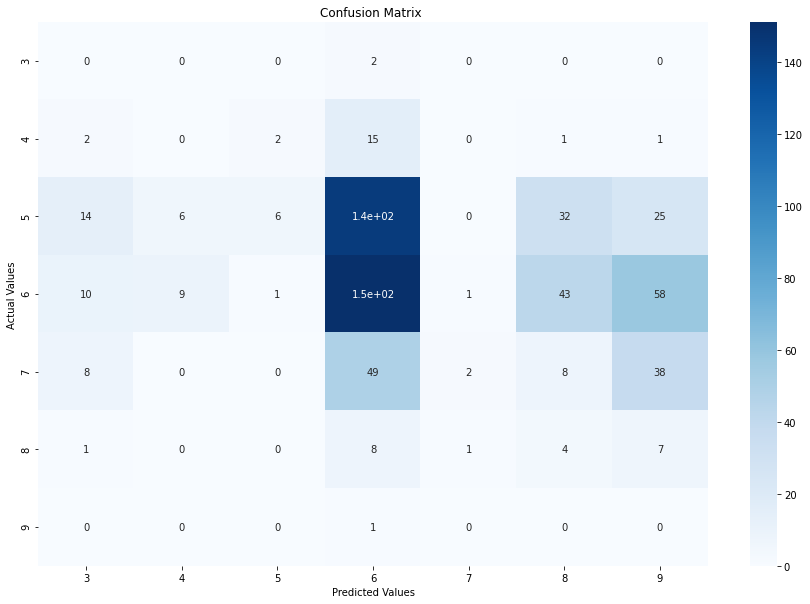



Confusion matrix for the Bernoulli NB with 90 % training data :



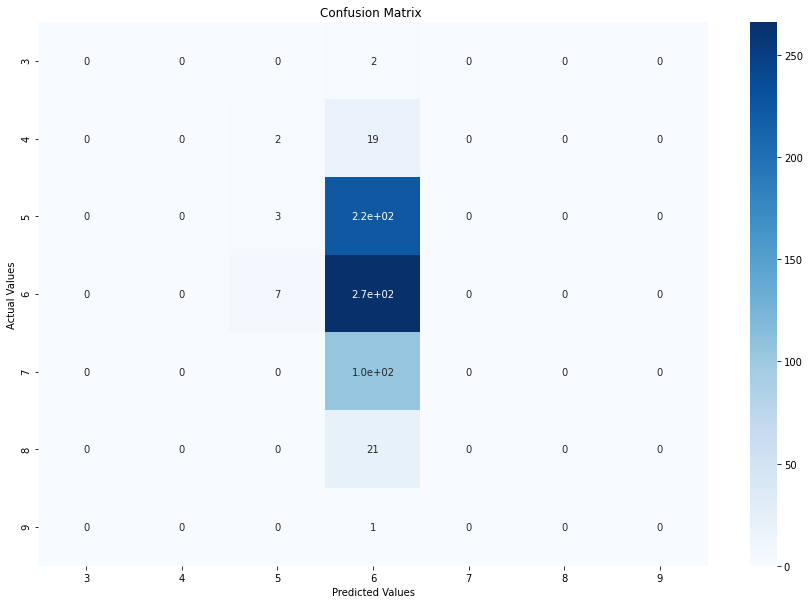



Confusion matrix for the Gaussian NB with 70 % training data :



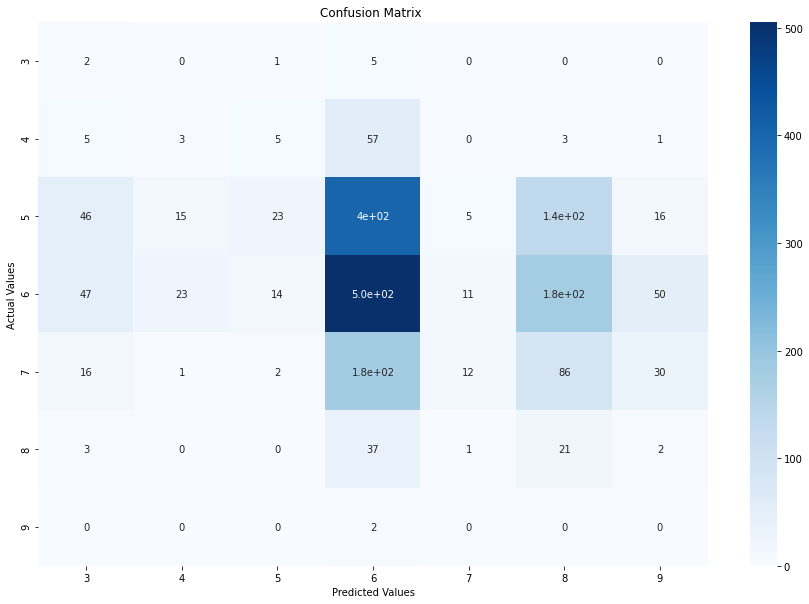



Confusion matrix for the Bernoulli NB with 70 % training data :



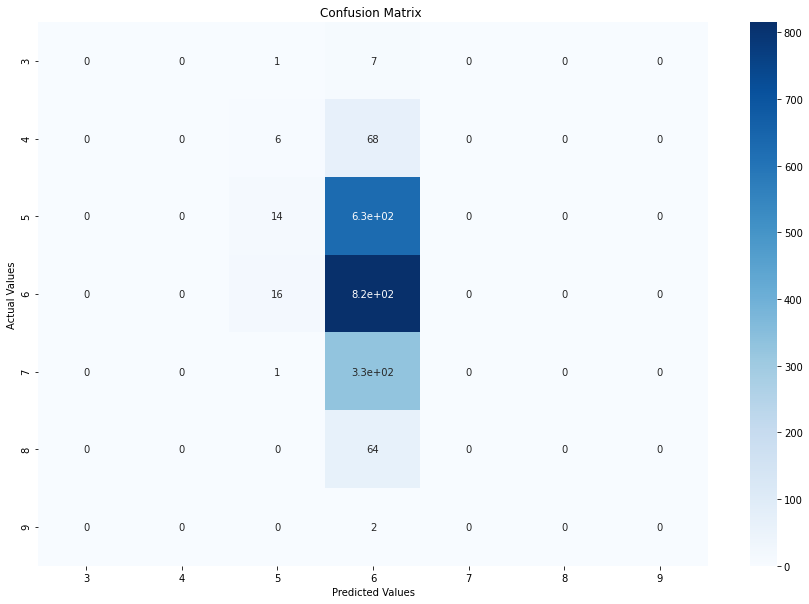



Model        Training %    Testing %    Accuracy    Precison    Recall
---------  ------------  -----------  ----------  ----------  --------
Gaussian             90           10     25.0769     23.1461   11.2724
Bernoulli            90           10     41.3846     80.9561   14.1082
Gaussian             70           30     29.0256     21.2401   18.5524
Bernoulli            70           30     42.5128     82.7811   14.3222


In [ ]:
def confusion(test_y,pred_y):
  cm=metrics.confusion_matrix(test_y,pred_y,)
  #Datatframe to plot confusion matrix
  df=pd.DataFrame(cm,index=['3','4','5','6','7','8','9'],columns=['3','4','5','6','7','8','9'])
  plt.figure(figsize=(15,10))
  sns.heatmap(df,annot=True,cmap='Blues')
  st='Confusion Matrix '
  plt.title(st)
  plt.ylabel('Actual Values')
  plt.xlabel('Predicted Values')
  plt.show()
  print("\n")

table=[]
def res(model,xin,yin,xtest,ytest,ntrain,modelName):
  model.fit(xin,yin)
  y_pred=model.predict(xtest)
  print("Confusion matrix for the",modelName,"NB with",ntrain,"% training data :\n")
  confusion(ytest,y_pred)
  accuracy=100*metrics.accuracy_score(ytest,y_pred)
  precision=100*metrics.precision_score(ytest,y_pred,average="macro",zero_division=1)#macro tells to find unweighted avg
  recall=100*metrics.recall_score(ytest,y_pred,average="macro",zero_division=1)
  table.append([modelName,ntrain,100-ntrain,accuracy,precision,recall])

NBG=GaussianNB()
NBB=BernoulliNB()


res(NBG,train_x,train_y,test_x,test_y,90,"Gaussian")
res(NBB,train_x,train_y,test_x,test_y,90,"Bernoulli")
res(NBG,train_x1,train_y1,test_x1,test_y1,70,"Gaussian")
res(NBB,train_x1,train_y1,test_x1,test_y1,70,"Bernoulli")



print(tabulate(table,headers=["Model","Training %","Testing %","Accuracy","Precison","Recall"]))


Naive Bayes - CROSS VALIDATION

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# to supress the zero division warnings

def met(model,cv,cvtype,k,modelName,table):
  # cv tells what is the parameters for cross validation, if nothing is specified it does 5 fold cross validation
  AccuracyScores=cross_val_score(model,x,y,scoring='accuracy',cv=cv)
  PrecisionScores=cross_val_score(model,x,y,scoring='precision_macro',cv=cv)
  RecallScores=cross_val_score(model,x,y,scoring='recall_macro',cv=cv)
  accuracy=round(100*np.mean(AccuracyScores),2)
  precision=round(100*np.mean(PrecisionScores),2)
  recall=round(100*np.mean(RecallScores),2)
  table.append([modelName,cvtype,k,accuracy,precision,recall])

def met_supp(k,model,modelName,cv1,cv2,table):
  met(model,cv1[0],cv1[1],k,modelName,table)
  met(model,cv2[0],cv2[1],k,modelName,table)

NBG=GaussianNB()
NBB=BernoulliNB()


# PERFORMANCES
print('\tCross validation results for different models and k values\n')
for i in range(5,11):
  table=[]
  # i fold cross validation with and without repeated cross vlaidation, repeated cross validation to remove statistical noise
  cv1=[KFold(n_splits=i),"K Fold CV"]
  cv2=[RepeatedKFold(n_splits=i,n_repeats=5,random_state=42),"Repeated K Fold CV"]
  # no. of times to repeat is set as 5
  met_supp(i,NBG,'GaussianNB',cv1,cv2,table)
  met_supp(i,NBB,'BernoulliNB',cv1,cv2,table)
  print(tabulate(table,headers=["Model","Cross Validation Type","K","Accuracy","Precision","Recall"]))
  print("\n-----------------------------------------------------------------------------\n")


	Cross validation results for different models and k values

Model        Cross Validation Type      K    Accuracy    Precision    Recall
-----------  -----------------------  ---  ----------  -----------  --------
GaussianNB   K Fold CV                  5       39.39        31.04     27.23
GaussianNB   Repeated K Fold CV         5       45.52        26.6      25.59
BernoulliNB  K Fold CV                  5       43.57         8.66     15.72
BernoulliNB  Repeated K Fold CV         5       43.49         9.1      15.14

-----------------------------------------------------------------------------

Model        Cross Validation Type      K    Accuracy    Precision    Recall
-----------  -----------------------  ---  ----------  -----------  --------
GaussianNB   K Fold CV                  6       41.51        25.96     25.57
GaussianNB   Repeated K Fold CV         6       45.46        26.76     25.67
BernoulliNB  K Fold CV                  6       43.59         9.25     15.89
BernoulliNB 